Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.79509807 0.90392154 0.99523085
0.7441176 0.8598039 0.8754907
0.6764706 0.67156863 0.7417533


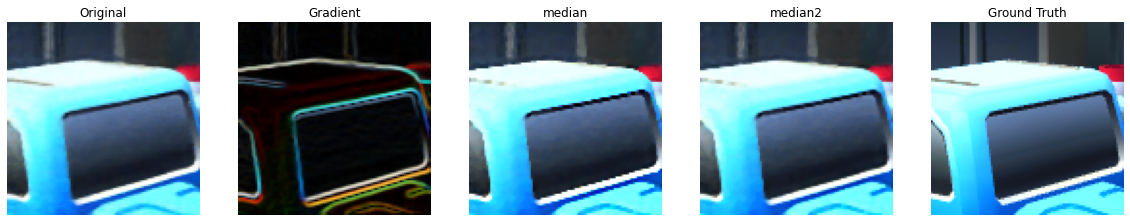

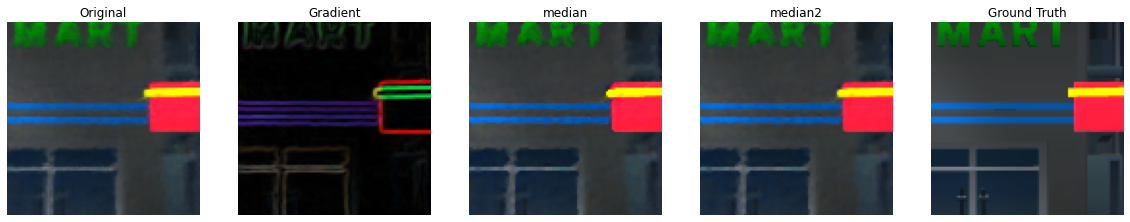

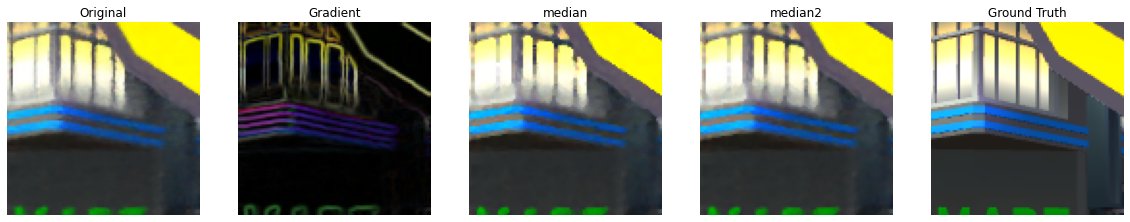

In [26]:
# 图像去噪平滑滤波
# 使用opencv的自带函数实现，与自编写作比较
# 产生椒盐噪声，高斯噪声等
# 使用中值滤波，平均滤波，高斯滤波，方框滤波

import numpy as np
import cv2
import matplotlib.pyplot as plt

for i in range(3):
    image_gt = cv2.imread('/home/dengnc/deep_view_syn/data/gas_fovea_2020.12.31/train/view_%04d.png' % i)
    image = cv2.imread('/home/dengnc/deep_view_syn/data/gas_fovea_2020.12.31/fovea_rgb@msl-rgb_e10_fc256x4_d1-50_s16/output/model-epoch_500/train/out_view_%04d.png' % i)
    plt.figure(figsize=(20,4))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original')

    xgrd = cv2.Sobel(image,cv2.CV_32FC1,1,0) / 4 / 255
    ygrd = cv2.Sobel(image,cv2.CV_32FC1,0,1) / 4 / 255
    grd = np.sqrt(xgrd ** 2 + ygrd ** 2)
    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(grd, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gradient')

    kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]], np.float32) #定义一个核
    sharp = cv2.filter2D(image, -1, kernel=kernel)
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('sharp')

    # 中值滤波
    result4 = cv2.medianBlur(image, 3)
    #result4 = cv2.fastNlMeansDenoisingColored(result4,None,5,5,7,21)
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(result4, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('median')

    result5 = result4 * (1 - grd) + image * grd
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(result5/255, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('median2')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Ground Truth')

    plt.show()

